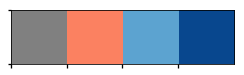

In [1]:
import random
from six.moves import cPickle as pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.patches import Circle
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')
from PIL import Image
import numpy as np
from scipy.misc import comb
from math import log, exp, sqrt
from collections import Counter, OrderedDict
import numpy as np, scipy.stats as st
import seaborn as sns
sns.set_context("talk")
# sns.set_context('talk')
import string
import json
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# COLORS = ["#808080", "#3498db", "#0000b3", "#ffd480", "#e74c3c"]
blues = sns.color_palette('Blues', 10)
reds = sns.color_palette('Reds')
COLORS = ["#808080", reds[2], blues[5], blues[9]]
sns.palplot(sns.color_palette(COLORS))

# from multiprocessing import set_start_method
# try:
#     set_start_method('spawn')
# except RuntimeError:
#     pass

## Abstract

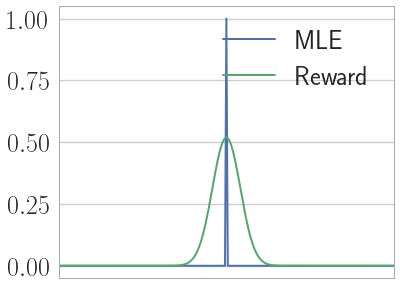

In [2]:
L = 800
x = np.arange(L)
y = np.zeros(L)
center = 300
a = 1e-5
y = 1/a * (1/np.pi * 1/(1+((x- center)/a)**2))
y /= np.sum(y)

if 0:
    centers = [center] + np.random.randint(low=1,
                                           high=L,
                                           size=10)
    sigmas = np.random.randint(low=1,
                               high=10,
                               size=10) / 10
    weights = [5] + np.random.randint(low=1,
                                      high=10,
                                      size=10)/2
    weights = weights / np.sum(weights)
    z = np.zeros(L)
    for w, c, s in zip(weights, centers, sigmas):
        z += w * np.exp(-(x-c)**2/2/s)
    # z += 1/30 * np.random.randn(50)
if 1:
    sigma = 10
    z = np.exp(-(x-center)**2/2/sigma**2)
z /= np.sum(z)
z = 13 * z
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('talk', font_scale=2, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
plt.figure(figsize=(6,5))
plt.plot(x, y, label='MLE')
plt.plot(x, z, label='Reward')
plt.xlim([center-12*sigma, center+12*sigma])
plt.xticks([])
plt.legend()
# plt.xticks(centers, ['jungle', 'forest', 'clearing'], rotation=45)

(-5.7250732857335205, 20.086542284579608)
(-11.978306984842662, 22.976581863638106)
(-8.3233408756863412, 24.645196966617803)
(-2.0996040439526045, 15.925606340141577)
(-5.3416506831057857, 19.598352401355434)
(-9.5966490634914869, 22.222348507991704)


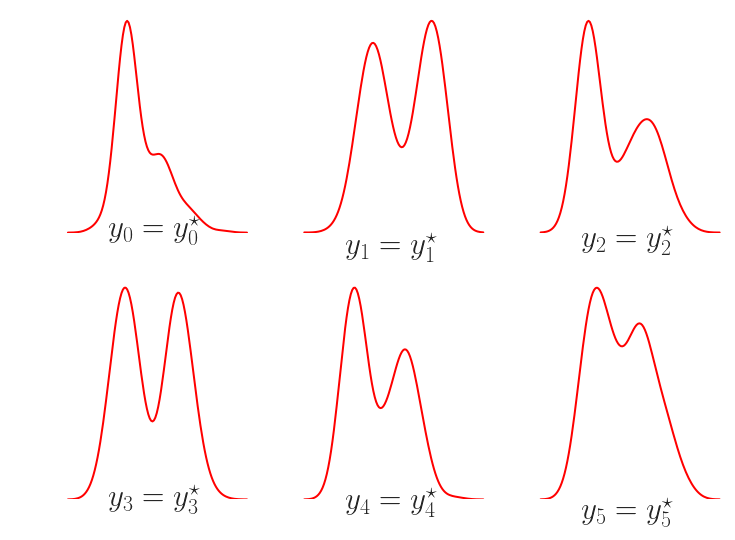

In [18]:
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('talk', font_scale=2, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
# plt.figure(figsize=(6,5))
# plt.plot((2, 2), (0, 1), 'r--')
# plt.plot((2.3, 2.3), (0, 1), 'r--')
# plt.plot((0, 2), (0, 0), 'r-')
# plt.plot((2.3, 4), (0, 0), 'r-')
# plt.plot((2, 2.3), (1, 1), 'r-')
# plt.text(1.7, 1.1, '$y=y^\star$')
# plt.axis('off')
# plt.savefig('../figures/slides1.png', bbox_inches='tight', transparent=True, dpi=300)
f, axs = plt.subplots(2, 3,figsize=(12,9))
axes = axs.flatten()
for e , ax in enumerate(axes):
    a = np.random.randint(low=0, high=5)
    b = np.random.randint(low=6, high=13)
    c, d = np.random.randint(low=1, high=4, size=(2,)) 
    reward = np.hstack([a + c * np.random.randn(120), b + d * np.random.randn(120)])
    sns.kdeplot(reward, color="red", ax=ax)
    xx = ax.get_xlim()
    print(xx)
    w = xx[1] - xx[0]
    ax.text(xx[0]+w/4, -.01, '$y_%d=y_%d^\star$' % (e, e))
    ax.axis('off')
plt.savefig('../figures/slides2.png', bbox_inches='tight', transparent=True, dpi=300)

## Lengths

In [ ]:
L = pickle.load(open('../results/lengths.p', 'rb'))

In [ ]:
train = Counter([min(len(c), 16) for imid in caps for c in caps[imid]])
baseline = Counter(L['save/fncnn6_reset_topdown_resnet152_msc'])
tok = Counter(L['save/fncnn6_reset_word_coco_tword009_idf10_a03_topdown'])
seq =Counter(L['save/fncnn6_reset_importance_qhamming_limited1_tsent017_rcider_tsent05_a04_topdown'])
comb = Counter(L['save/fncnn6_reset_combine_importance_qhamming_limited2_tsent03_rcider_tsent05_a04_word_coco_tword009_idf10_a03_topdown'])

sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('paper', font_scale=2.3, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
f, ax = plt.subplots(1,1, figsize=(8, 6))
e = 0
w = .17
for lab , cnt in zip(['COCO', 'ML', 'tok', 'Seq', 'Tok-Seq'], [train, baseline, tok, seq, comb]):
    sum_cnt = sum(list(cnt.values()))
    cnt_norm = [c/sum_cnt for c in list(cnt.values())]
    xs = np.array(list(cnt)) + (e-2) * w
    ax.bar(xs, cnt_norm, width=w, align='edge', color=COLORS[e], alpha=.7, label=lab)
    e += 1
plt.legend()
plt.xticks(np.arange(7,17))
plt.xlim(6.5, 16.5)
plt.savefig("../figures/lengths_topdown.png",dpi=300, bbox_inches='tight') 

In [ ]:
baseline = Counter(L['save/fncnn6_reset_baseline_showtell152'])
tok = Counter(L['save/fncnn6_reset_word_coco_tword009_idf10_a07_showtell152'])
seq =Counter(L['save/fncnn6_reset_importance_qhamming_limited1_tsent017_rcider_tsent05_a04_showtell152'])
comb = Counter(L['save/fncnn6_reset_combine_importance_qhamming_limited2_tsent03_rcider_tsent05_a05_word_coco_tword009_idf10_a07_showtell152'])
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('paper', font_scale=2.3, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
f, ax = plt.subplots(1,1, figsize=(8, 6))
e = 0
w = .17
for lab , cnt in zip(['COCO', 'ML', 'tok', 'Seq', 'Tok-Seq'], [train, baseline, tok, seq, comb]):
    sum_cnt = sum(list(cnt.values()))
    cnt_norm = [c/sum_cnt for c in list(cnt.values())]
    xs = np.array(list(cnt)) + (e-2) * w
    ax.bar(xs, cnt_norm, width=w, align='edge', color=COLORS[e], alpha=.7, label=lab)
    e += 1
plt.legend()
plt.xticks(np.arange(7,17))
plt.xlim(6.5, 16.5)
plt.savefig("../figures/lengths_showtell.png",dpi=300, bbox_inches='tight') 